In [1]:
#importing required libraries 

import matplotlib.pyplot as plt
import seaborn as sns
import re
from random import randint #to get random values
from time import sleep #to sleep the algorithm while scraping websites
import requests #requests module to requests information from websites
from bs4 import BeautifulSoup
import pandas as pd #for dataframe 
import numpy as np #for numerical analysis


In [ ]:

name = []
apartment_price = []
completion_stage = []
agent_contact = []
day_posted = []
rent_location = []


URL = 'https://www.propertypro.ng/property-for-rent/in/abuja?page='
for page in range(1,550):
    req = requests.get(URL + str(page))
    #html_ = requests.get('https://www.propertypro.ng/property-for-rent/in/abuja').text
    #create an instance of beautifulsoup
    soup = BeautifulSoup(req.text, 'lxml')
    apartments = soup.find_all('div', class_ ='single-room-sale listings-property')
    #get and find infomation about unique properties
    #locat = soup.find_all('div', class_ = 'single-room-img result-img')

    for apartment in apartments:
        try:
            title  = apartment.find('h4', class_= 'listings-property-title').text
        except:
            title = None
        try:
            price = apartment.find('h3', class_ = 'listings-price').text
        except:
            price = None
        try:
            furnishing = apartment.find('div', class_ = 'furnished-btn').text.replace('\n','')
        except:
            furnishing = None
        try:
            agent_no = apartment.find('div', class_ = 'phone-icon').text.replace('\n','')
        except:
            agent_no = None
        try:
            date_posted = apartment.find('div', class_ = 'single-room-text').h5.text
        except:
            date_posted = None
        try:
            location = apartment.find('div', class_ = 'single-room-img result-img').img['title']
        except:
            location = None
        name.append(title)
        apartment_price.append(price)
        completion_stage.append(furnishing)
        agent_contact.append(agent_no)
        day_posted.append(date_posted)
        rent_location.append(location)
    sleep(randint(4,10))

In [ ]:
df = pd.DataFrame()
df['name'] = name
df['apartment_price'] = apartment_price
df['completion_stage'] = completion_stage
df['agent_contact'] = agent_contact
df['day_posted'] = day_posted
df['rent_location'] =  rent_location
df

In [ ]:
df.to_csv('Real_estate.csv')

In [2]:
#the dataset was scrapped from propertyng website and was saved into a csv file
#loading the dataset from a csv file
real_estate_df = pd.read_csv('Real_estate.csv', index_col= [0])

In [3]:
#checking the dataset
real_estate_df.head(10)

,name,apartment_price,completion_stage,agent_contact,day_posted,rent_location
0,3 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 3,800,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 27 Jun 2022",3 bedroom Flat / Apartment for rent Durumi Abuja
1,4 BEDROOM HOUSE FOR RENT,"₦ 7,000,000/year",ServicedNewly Built,8.036492e+09,"Updated 25 Jul 2022, Added 27 Jun 2022",4 bedroom House for rent Katampe Extention Dip...
2,2 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 2,200,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 11 Jun 2022",2 bedroom Flat / Apartment for rent Gaduwa Est...
3,6 BEDROOM COMMERCIAL PROPERTY FOR RENT,"₦ 20,000,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 06 Jul 2022",6 bedroom Commercial Property for rent By Ecow...
4,10 BEDROOM COMMERCIAL PROPERTY FOR RENT,"₦ 40,000,000/year",FurnishedServicedNewly Built,8.160442e+09,"Updated 25 Jul 2022, Added 10 Jul 2022",10 bedroom Commercial Property for rent Katamp...
5,COMMERCIAL PROPERTY FOR RENT,"₦ 15,000,000/year",NaN,8.166684e+09,"Updated 25 Jul 2022, Added 24 Dec 2021",Commercial Property for rent Wuse 2 Abuja
6,4 BEDROOM HOUSE FOR RENT,"₦ 3,500,000/year",Newly Built,8.160442e+09,"Updated 25 Jul 2022, Added 10 Jun 2022",4 bedroom House for rent Northstar Garden Esta...
7,5 BEDROOM HOUSE FOR RENT,"₦ 7,000,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 07 Jun 2022",5 bedroom House for rent Wuye Abuja
8,5 BEDROOM HOUSE FOR RENT,"₦ 20,000,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 24 May 2022",5 bedroom House for rent Asokoro Abuja
9,2 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 4,000,000/year",FurnishedServiced,8.160442e+09,"Updated 25 Jul 2022, Added 16 Jun 2022",2 bedroom Flat / Apartment for rent Wuye Abuja


In [4]:
#checking the shape of the data
real_estate_df.shape

(10940, 6)

In [20]:
#project objectives
#get places with the most expensive apartments, categorised by no of beds
#Areas with more property listings
#Imagine yourself as a property person
#what are the insights you are looking for
#where is the best place to get a self contained in abuja (price - )
#What about a three bd, four bd etc


In [5]:
#setting the index
real_estate_df.columns


Index(['name', 'apartment_price', 'completion_stage', 'agent_contact',
       'day_posted', 'rent_location'],
      dtype='object')

In [6]:
#rename columns
real_estate_df.rename(columns = {'name': 'type', 'apartment_price':'price', 'rent_location': 'apartment_location'}, inplace=True)


In [7]:
real_estate_df.head(10)

,type,price,completion_stage,agent_contact,day_posted,apartment_location
0,3 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 3,800,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 27 Jun 2022",3 bedroom Flat / Apartment for rent Durumi Abuja
1,4 BEDROOM HOUSE FOR RENT,"₦ 7,000,000/year",ServicedNewly Built,8.036492e+09,"Updated 25 Jul 2022, Added 27 Jun 2022",4 bedroom House for rent Katampe Extention Dip...
2,2 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 2,200,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 11 Jun 2022",2 bedroom Flat / Apartment for rent Gaduwa Est...
3,6 BEDROOM COMMERCIAL PROPERTY FOR RENT,"₦ 20,000,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 06 Jul 2022",6 bedroom Commercial Property for rent By Ecow...
4,10 BEDROOM COMMERCIAL PROPERTY FOR RENT,"₦ 40,000,000/year",FurnishedServicedNewly Built,8.160442e+09,"Updated 25 Jul 2022, Added 10 Jul 2022",10 bedroom Commercial Property for rent Katamp...
5,COMMERCIAL PROPERTY FOR RENT,"₦ 15,000,000/year",NaN,8.166684e+09,"Updated 25 Jul 2022, Added 24 Dec 2021",Commercial Property for rent Wuse 2 Abuja
6,4 BEDROOM HOUSE FOR RENT,"₦ 3,500,000/year",Newly Built,8.160442e+09,"Updated 25 Jul 2022, Added 10 Jun 2022",4 bedroom House for rent Northstar Garden Esta...
7,5 BEDROOM HOUSE FOR RENT,"₦ 7,000,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 07 Jun 2022",5 bedroom House for rent Wuye Abuja
8,5 BEDROOM HOUSE FOR RENT,"₦ 20,000,000/year",NaN,8.160442e+09,"Updated 25 Jul 2022, Added 24 May 2022",5 bedroom House for rent Asokoro Abuja
9,2 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 4,000,000/year",FurnishedServiced,8.160442e+09,"Updated 25 Jul 2022, Added 16 Jun 2022",2 bedroom Flat / Apartment for rent Wuye Abuja


In [8]:
#cleaning the data
#droping unwanted columns
#the contact of the real estate agents is not needed in this analysis
real_estate_df.drop(['agent_contact'], axis = 1, inplace=True)

In [9]:
real_estate_df

,type,price,completion_stage,day_posted,apartment_location
0,3 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 3,800,000/year",NaN,"Updated 25 Jul 2022, Added 27 Jun 2022",3 bedroom Flat / Apartment for rent Durumi Abuja
1,4 BEDROOM HOUSE FOR RENT,"₦ 7,000,000/year",ServicedNewly Built,"Updated 25 Jul 2022, Added 27 Jun 2022",4 bedroom House for rent Katampe Extention Dip...
2,2 BEDROOM FLAT / APARTMENT FOR RENT,"₦ 2,200,000/year",NaN,"Updated 25 Jul 2022, Added 11 Jun 2022",2 bedroom Flat / Apartment for rent Gaduwa Est...
3,6 BEDROOM COMMERCIAL PROPERTY FOR RENT,"₦ 20,000,000/year",NaN,"Updated 25 Jul 2022, Added 06 Jul 2022",6 bedroom Commercial Property for rent By Ecow...
4,10 BEDROOM COMMERCIAL PROPERTY FOR RENT,"₦ 40,000,000/year",FurnishedServicedNewly Built,"Updated 25 Jul 2022, Added 10 Jul 2022",10 bedroom Commercial Property for rent Katamp...
...,...,...,...,...,...
10935,HOUSE FOR RENT,"₦ 3,100,000",NaN,Added 12 Apr 2017,House for rent Area 11 Abuja
10936,HOUSE FOR RENT,"₦ 7,000,000",NaN,Added 12 Apr 2017,"House for rent Asokoro , Abuja Asokoro Abuja"
10937,HOUSE FOR RENT,"₦ 3,000,000",NaN,Added 12 Apr 2017,"House for rent Asokoro , Abuja Asokoro Abuja"
10938,HOUSE FOR RENT,"₦ 3,500,000",NaN,Added 12 Apr 2017,"House for rent House 12, Off 69 Road Gwarinpa ..."


In [10]:
#we want to perform get numerical insights from the price table
#th price column needs to be cleaned and converted from string data type to int

characters_to_remove = [' ', ',', '/year', '', '₦']
regular_expression = '[' + re.escape (''. join (characters_to_remove)) + ']'


#data["column_name"] = data["column_name"].apply(lambda x: x.replace("characters_need_to_replace", "new_characters"))
real_estate_df['price'] = real_estate_df['price'].str.replace(regular_expression, '', regex=True)

In [11]:
real_estate_df["price"]

0         3800000
1         7000000
2         2200000
3        20000000
4        40000000
           ...   
10935     3100000
10936     7000000
10937     3000000
10938     3500000
10939     2000000
Name: price, Length: 10940, dtype: object

In [12]:
#there are some disparities in the price column, some of the apartment_prices are listed in dollars.
real_estate_df.drop(real_estate_df.loc[real_estate_df['price'].str.contains(r'(^\$.*)')].index, inplace = True)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\352474239.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['price'].str.contains(r'(^\$.*)')].index, inplace = True)


In [13]:
real_estate_df['price']

0         3800000
1         7000000
2         2200000
3        20000000
4        40000000
           ...   
10935     3100000
10936     7000000
10937     3000000
10938     3500000
10939     2000000
Name: price, Length: 10899, dtype: object

In [14]:
#drop some rows within the price column having rent paid per day
real_estate_df.drop(real_estate_df.loc[real_estate_df['price'].str.contains(r'([day]$.*)')].index, inplace = True)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\677330608.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['price'].str.contains(r'([day]$.*)')].index, inplace = True)


In [15]:
#checking th price column
real_estate_df['price'].unique()

array(['3800000', '7000000', '2200000', '20000000', '40000000',
       '15000000', '3500000', '4000000', '3000000', '2000000', '5000000',
       '2500000', '7500000', '6000000', '16000000', '1800000', '10000000',
       '24000000', '25000000000', '13000000', '1200000', '500000',
       '350000', '16500000', '4500000', '12000000', '50000', '22000000',
       '8000000', '2250000', '23000000', '8500000', '1300000', '21000sqm',
       '1500000', '1000000', '2570000', '800000', '6500000', '650000',
       '600000', '1600000', '50000000', '65000000', '1750000', '18000000',
       '14000000', '900000', '1400000', '30000000', '850000', '1700000',
       '550000', '35000sqm', '3400000', '5500000', '7200000', '10500000',
       '2600000', '1900000', '12800000', '25000000', '2700000', '750000',
       '250000', '35000000', '30000sqm', '12500000', '80000000',
       '150000000', '32000000', '2900000', '9000000', '300000', '400000',
       '4400000', '12400000', '120000000', '320000', '700000', '61

In [16]:
characters_to_drop = ['sqm','month']
regular_exp = '[' + re.escape (''. join (characters_to_drop)) + ']'

real_estate_df.drop(real_estate_df.loc[real_estate_df['price'].str.contains(regular_exp)].index, inplace = True)

In [17]:
real_estate_df['price'].unique()

array(['3800000', '7000000', '2200000', '20000000', '40000000',
       '15000000', '3500000', '4000000', '3000000', '2000000', '5000000',
       '2500000', '7500000', '6000000', '16000000', '1800000', '10000000',
       '24000000', '25000000000', '13000000', '1200000', '500000',
       '350000', '16500000', '4500000', '12000000', '50000', '22000000',
       '8000000', '2250000', '23000000', '8500000', '1300000', '1500000',
       '1000000', '2570000', '800000', '6500000', '650000', '600000',
       '1600000', '50000000', '65000000', '1750000', '18000000',
       '14000000', '900000', '1400000', '30000000', '850000', '1700000',
       '550000', '3400000', '5500000', '7200000', '10500000', '2600000',
       '1900000', '12800000', '25000000', '2700000', '750000', '250000',
       '35000000', '12500000', '80000000', '150000000', '32000000',
       '2900000', '9000000', '300000', '400000', '4400000', '12400000',
       '120000000', '320000', '700000', '6100000', '2750000', '36000000',
     

In [18]:
#now convert apartment_price from string to int
real_estate_df['price'] = real_estate_df['price'].astype(float)


In [19]:
real_estate_df['price']

0         3800000.0
1         7000000.0
2         2200000.0
3        20000000.0
4        40000000.0
            ...    
10935     3100000.0
10936     7000000.0
10937     3000000.0
10938     3500000.0
10939     2000000.0
Name: price, Length: 10852, dtype: float64

In [20]:
#the column contains unrealistic rent prices such as prices less than 10 nigerian naira
#drop unrealistic price like this, which might cause the data and analtyics skewed
real_estate_df.drop(real_estate_df.loc[real_estate_df['price'] < 10].index, inplace = True)

In [21]:
#cleaning the data
#spliting the column, to get the location of the apartment listings
location = real_estate_df['apartment_location'].str.split(pat = 'for rent', expand = True)
real_estate_df[['info', 'Location']] = location

In [22]:
real_estate_df.head(5)

,type,price,completion_stage,day_posted,apartment_location,info,Location
0,3 BEDROOM FLAT / APARTMENT FOR RENT,3800000.0,NaN,"Updated 25 Jul 2022, Added 27 Jun 2022",3 bedroom Flat / Apartment for rent Durumi Abuja,3 bedroom Flat / Apartment,Durumi Abuja
1,4 BEDROOM HOUSE FOR RENT,7000000.0,ServicedNewly Built,"Updated 25 Jul 2022, Added 27 Jun 2022",4 bedroom House for rent Katampe Extention Dip...,4 bedroom House,Katampe Extention Diplomatic Zone Katampe Ext...
2,2 BEDROOM FLAT / APARTMENT FOR RENT,2200000.0,NaN,"Updated 25 Jul 2022, Added 11 Jun 2022",2 bedroom Flat / Apartment for rent Gaduwa Est...,2 bedroom Flat / Apartment,Gaduwa Estate Gaduwa Abuja
3,6 BEDROOM COMMERCIAL PROPERTY FOR RENT,20000000.0,NaN,"Updated 25 Jul 2022, Added 06 Jul 2022",6 bedroom Commercial Property for rent By Ecow...,6 bedroom Commercial Property,By Ecowas Asokoro Abuja
4,10 BEDROOM COMMERCIAL PROPERTY FOR RENT,40000000.0,FurnishedServicedNewly Built,"Updated 25 Jul 2022, Added 10 Jul 2022",10 bedroom Commercial Property for rent Katamp...,10 bedroom Commercial Property,Katampe Ext Abuja


In [23]:
real_estate_df.drop(['apartment_location', 'info'], axis=1, inplace = True)

In [24]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10848 entries, 0 to 10939
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              10848 non-null  object 
 1   price             10848 non-null  float64
 2   completion_stage  4342 non-null   object 
 3   day_posted        10848 non-null  object 
 4   Location          10848 non-null  object 
dtypes: float64(1), object(4)
memory usage: 508.5+ KB


In [25]:
#to easily group the dataset 
#cleaning the datasets to create well descriptory data, by number of beds availiable
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SELF.*)'), 'type'] = 'Self_contain'


#df['name'].str.contains(r'(^SELF.*)')
#df.loc[self_filt, 'name'] ="Self_contain"

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\627221684.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SELF.*)'), 'type'] = 'Self_contain'


In [26]:
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^1\s+)'), 'type'] = 'One_Bedroom'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^2\s+)'), 'type'] = 'Two_Bedrooms'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^3\s+)'), 'type'] = 'Three_Bedrooms'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^4\s+)'), 'type'] = 'Four_Bedrooms'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^5\s+)'), 'type'] = 'Five_Bedrooms'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^6\s+)'), 'type'] = 'Six_Bedrooms'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^7\s+)'), 'type'] = 'Seven_Bedrooms'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^8\s+)'), 'type'] = 'Eight_Bedrooms'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^9\s+)'), 'type'] = 'Nine_Bedrooms'
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^10\s+)'), 'type'] = 'Ten_Bedrooms'

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\1906203765.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.loc[real_estate_df['type'].str.contains(r'(^1\s+)'), 'type'] = 'One_Bedroom'
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\1906203765.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.loc[real_estate_df['type'].str.contains(r'(^2\s+)'), 'type'] = 'Two_Bedrooms'
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\1906203765.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.loc[real_estate_df['type'].str.contains(r'(^3\s+)'), 'type'] = 'Three_Bedrooms'
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\1906203765.py:4: UserWarning: This pattern is interpreted as a regular e

In [27]:
#checking the data
real_estate_df.head(3)

,type,price,completion_stage,day_posted,Location
0,Three_Bedrooms,3800000.0,NaN,"Updated 25 Jul 2022, Added 27 Jun 2022",Durumi Abuja
1,Four_Bedrooms,7000000.0,ServicedNewly Built,"Updated 25 Jul 2022, Added 27 Jun 2022",Katampe Extention Diplomatic Zone Katampe Ext...
2,Two_Bedrooms,2200000.0,NaN,"Updated 25 Jul 2022, Added 11 Jun 2022",Gaduwa Estate Gaduwa Abuja


In [22]:
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^FLAT\s+)'), 'type'] = 'FLAT'

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4796\2284828908.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.loc[real_estate_df['type'].str.contains(r'(^FLAT\s+)'), 'type'] = 'FLAT'


In [28]:
real_estate_df.loc[real_estate_df['type'].str.contains(r'(^TERRACED\s+)'), 'type'] = 'Terraced_apartment'



C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\3811749174.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.loc[real_estate_df['type'].str.contains(r'(^TERRACED\s+)'), 'type'] = 'Terraced_apartment'


In [29]:
#dropping some unorganized data
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^[B].*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^[WRCMH].*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^MIXED.*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^[C].*)')].index, inplace = True)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\1020972194.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^[B].*)')].index, inplace = True)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\1020972194.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^[WRCMH].*)')].index, inplace = True)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\1020972194.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^MIXED.*)')].index, inplace = True)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\1020972194

In [30]:
#for effective grouping of some of these
#real_estate_df['type'].unique()

real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SH.*)')].index, inplace = True)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\3370260153.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SH.*)')].index, inplace = True)


In [33]:
real_estate_df['type'].unique()

array(['Three_Bedrooms', 'Four_Bedrooms', 'Two_Bedrooms', 'Six_Bedrooms',
       'Ten_Bedrooms', 'Five_Bedrooms', 'FLAT / APARTMENT FOR RENT',
       'One_Bedroom', 'Seven_Bedrooms', 'Eight_Bedrooms', 'Nine_Bedrooms',
       'Terraced_apartment', 'Self_contain', ' FOR RENT'], dtype=object)

In [32]:
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SERVICED.*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SEMI.*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^DETACHED.*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^OFFICE.*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^LAND.*)')].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^EVENT.*)')].index, inplace = True)
#real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^EVENT.*)')].index, inplace = True)

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\145397324.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SERVICED.*)')].index, inplace = True)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\145397324.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^SEMI.*)')].index, inplace = True)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\145397324.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  real_estate_df.drop(real_estate_df.loc[real_estate_df['type'].str.contains(r'(^DETACHED.*)')].index, inplace = True)
C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\14539732

In [34]:
real_estate_df.drop(real_estate_df.loc[real_estate_df["type"] == ' FOR RENT'].index, inplace = True)

In [35]:
real_estate_df['type'].unique()

array(['Three_Bedrooms', 'Four_Bedrooms', 'Two_Bedrooms', 'Six_Bedrooms',
       'Ten_Bedrooms', 'Five_Bedrooms', 'FLAT / APARTMENT FOR RENT',
       'One_Bedroom', 'Seven_Bedrooms', 'Eight_Bedrooms', 'Nine_Bedrooms',
       'Terraced_apartment', 'Self_contain'], dtype=object)

In [39]:
real_estate_df.drop(real_estate_df.loc[real_estate_df["type"] == 'Terraced_apartment'].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df["type"] == 'FLAT / APARTMENT FOR RENT'].index, inplace = True)

In [40]:
real_estate_df.shape

(9693, 5)

In [41]:
#price of apartment by number of beds
real_estate_df['type'].unique()

array(['Three_Bedrooms', 'Four_Bedrooms', 'Two_Bedrooms', 'Six_Bedrooms',
       'Ten_Bedrooms', 'Five_Bedrooms', 'One_Bedroom', 'Seven_Bedrooms',
       'Eight_Bedrooms', 'Nine_Bedrooms', 'Self_contain'], dtype=object)

In [46]:
#cleaning the data
real_estate_df.drop(real_estate_df.loc[real_estate_df['price'] < 0].index, inplace = True)



In [48]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [49]:
real_estate_df.describe()

,price
count,9686.0
mean,4612062.0
std,29394739.2
min,300.0
25%,1000000.0
50%,2000000.0
75%,3800000.0
max,2000000000.0


In [56]:
#there are some irregularities with the data, some prices are way above normal levels which could be due to human errors
real_estate_df.drop(real_estate_df.loc[real_estate_df['price'] == 2000000000].index, inplace = True)
real_estate_df.drop(real_estate_df.loc[real_estate_df['price'] < 300].index, inplace = True)


In [57]:
real_estate_df.describe()

,price
count,9685.0
mean,4406033.3
std,21282571.1
min,300.0
25%,1000000.0
50%,2000000.0
75%,3800000.0
max,1200000000.0


In [61]:
real_estate_df.drop(real_estate_df.loc[real_estate_df['price'] < 100000].index, inplace = True)

In [64]:
#Visualizing these apartment price
real_estate_df

,type,price,completion_stage,day_posted,Location
0,Three_Bedrooms,3800000,NaN,"Updated 25 Jul 2022, Added 27 Jun 2022",Durumi Abuja
1,Four_Bedrooms,7000000,ServicedNewly Built,"Updated 25 Jul 2022, Added 27 Jun 2022",Katampe Extention Diplomatic Zone Katampe Ext...
2,Two_Bedrooms,2200000,NaN,"Updated 25 Jul 2022, Added 11 Jun 2022",Gaduwa Estate Gaduwa Abuja
3,Six_Bedrooms,20000000,NaN,"Updated 25 Jul 2022, Added 06 Jul 2022",By Ecowas Asokoro Abuja
4,Ten_Bedrooms,40000000,FurnishedServicedNewly Built,"Updated 25 Jul 2022, Added 10 Jul 2022",Katampe Ext Abuja
...,...,...,...,...,...
10931,Four_Bedrooms,10000000,NaN,Added 12 Apr 2017,Jahi Jahi Phase 2 Abuja
10932,Two_Bedrooms,2000000,NaN,Added 12 Apr 2017,Rhine Street Maitama Abuja
10933,Three_Bedrooms,800000,NaN,Added 12 Apr 2017,Abacha Road Karu Abuja
10934,Four_Bedrooms,2700000,NaN,Added 12 Apr 2017,Off 69 Road Gwarinpa Abuja Gwarinpa Abuja


In [130]:
#create specific groups for the data
#group by apartment type

#gb_sales_demo=sales.groupby(by=["Region"]).aggregate({"Sales2016":"sum"})

real_estate_df.groupby(by =['type']).aggregate({'price': 'max'})

,price
type,
Eight_Bedrooms,60000000
Five_Bedrooms,900000000
Four_Bedrooms,465000000
Nine_Bedrooms,35000000
One_Bedroom,26000000
Self_contain,2500000
Seven_Bedrooms,164000000
Six_Bedrooms,800000000
Ten_Bedrooms,60000000


In [95]:
real_estate_df.groupby(by =['type']).aggregate({'price': 'mean'})

,price
type,
Eight_Bedrooms,19256000.0
Five_Bedrooms,12963257.2
Four_Bedrooms,6776808.3
Nine_Bedrooms,17500000.0
One_Bedroom,799407.6
Self_contain,426720.0
Seven_Bedrooms,20037234.0
Six_Bedrooms,26992137.9
Ten_Bedrooms,23670370.4


In [96]:
real_estate_df.groupby(by =['type']).aggregate({'price': 'min'})

,price
type,
Eight_Bedrooms,2900000
Five_Bedrooms,500000
Four_Bedrooms,200000
Nine_Bedrooms,8000000
One_Bedroom,100000
Self_contain,150000
Seven_Bedrooms,750000
Six_Bedrooms,110000
Ten_Bedrooms,100000


In [100]:
#plotting the charts


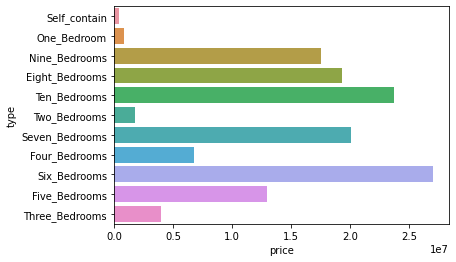

In [126]:
result_max = real_estate_df.groupby('type')['price'].max().reset_index().sort_values('price')
sns.barplot(x = 'price', y = 'type', data = real_estate_df, order = result_max['type'], ci=None)
#plt.ticklabel_format(style='plain', axis='x')
plt.show()

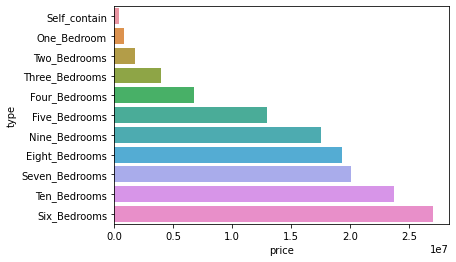

In [123]:
result = real_estate_df.groupby('type')['price'].mean().reset_index().sort_values('price')
sns.barplot(x = 'price', y = 'type', data = real_estate_df, order = result['type'], ci=None)
#plt.ticklabel_format(style='plain', axis='x')
plt.show()

<AxesSubplot:xlabel='count', ylabel='type'>

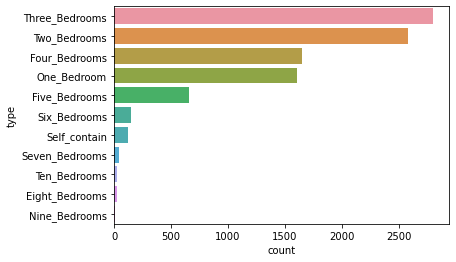

In [112]:
#create a count plot
real_estate_dfsorted
sns.countplot(y= "type", data = real_estate_df, order = real_estate_df['type'].value_counts().index)

In [ ]:
#grouping data by location

In [127]:
real_estate_df.loc[real_estate_df['Location'].str.contains('Lugbe'), 'Location'] = 'Lugbe'
real_estate_df.loc[real_estate_df['Location'].str.contains('Asokoro'), 'Location'] = 'Asokoro'
real_estate_df.loc[real_estate_df['Location'].str.contains('Maitama'), 'Location'] = 'Maitama'
real_estate_df.loc[real_estate_df['Location'].str.contains('Apo'), 'Location'] = 'Apo'
real_estate_df.loc[real_estate_df['Location'].str.contains('Galadimawa'), 'Location'] = 'Galadimawa'
real_estate_df.loc[real_estate_df['Location'].str.contains('Lokogoma'), 'Location'] = 'Lokogoma'
real_estate_df.loc[real_estate_df['Location'].str.contains('Wuse'), 'Location'] = 'Wuse'
real_estate_df.loc[real_estate_df['Location'].str.contains('Guzape'), 'Location'] = 'Guzape'
real_estate_df.loc[real_estate_df['Location'].str.contains('Garki'), 'Location'] = 'Garki'
real_estate_df.loc[real_estate_df['Location'].str.contains('Lifecamp'), 'Location'] = 'Lifecamp'
real_estate_df.loc[real_estate_df['Location'].str.contains('Gwarimpa'), 'Location'] = 'Gwarimpa'
real_estate_df.loc[real_estate_df['Location'].str.contains('Kubwa'), 'Location'] = 'Kubwa'
real_estate_df.loc[real_estate_df['Location'].str.contains('Wuye'), 'Location'] = 'Wuye'
real_estate_df.loc[real_estate_df['Location'].str.contains('Jahi'), 'Location'] = 'Jahi'
real_estate_df.loc[real_estate_df['Location'].str.contains('Jabi'), 'Location'] = 'Jabi'
real_estate_df.loc[real_estate_df['Location'].str.contains('Utako'), 'Location'] = 'Utako'
real_estate_df.loc[real_estate_df['Location'].str.contains('Mabushi'), 'Location'] = 'Mabushi'
real_estate_df.loc[real_estate_df['Location'].str.contains('Mararaba'), 'Location'] = 'Mararaba'
real_estate_df.loc[real_estate_df['Location'].str.contains('Kuje'), 'Location'] = 'Kuje'
real_estate_df.loc[real_estate_df['Location'].str.contains('Katampe'), 'Location'] = 'Katampe'
real_estate_df.loc[real_estate_df['Location'].str.contains('Gwarinpa'), 'Location'] = 'Gwarimpa'
real_estate_df.loc[real_estate_df['Location'].str.contains('Karu'), 'Location'] = 'Karu'
real_estate_df.loc[real_estate_df['Location'].str.contains('Kado'), 'Location'] = 'Kado'

In [128]:
listings = ['Lugbe', 'Asokoro', 'Maitama' ,'Apo' ,'Galadimawa' , 'Lokogoma' ,'Wuse', 'Guzape', 'Garki' ,'Lifecamp','Gwarimpa','Kubwa','Wuye','Jahi', 'Jabi', 'Utako', 'Mabushi', 'Mararaba', 'Kuje','Katampe' ,'Gwarimpa', 'Karu', 'Kado']


abuja_df = real_estate_df.loc[real_estate_df['Location'].isin(listings)]

In [137]:
#checking prices of different apartment listings by their specific locations
abuja_df.loc[abuja_df['Location'] == 'Apo'].groupby('type').mean()

,price
type,
Five_Bedrooms,10477272.7
Four_Bedrooms,4252702.7
One_Bedroom,1177959.2
Self_contain,387500.0
Seven_Bedrooms,7333333.3
Six_Bedrooms,4018333.3
Ten_Bedrooms,15000000.0
Three_Bedrooms,3431662.0
Two_Bedrooms,1572509.8


In [138]:
abuja_df.loc[abuja_df['Location'] == 'Lokogoma'].groupby('type').mean()

,price
type,
Five_Bedrooms,3433333.3
Four_Bedrooms,2681132.1
One_Bedroom,522381.0
Self_contain,308333.3
Three_Bedrooms,1603274.3
Two_Bedrooms,1119324.3


In [139]:
abuja_df.loc[abuja_df['Location'] == 'Asokoro'].groupby('type').mean()

,price
type,
Eight_Bedrooms,27333333.3
Five_Bedrooms,14214707.3
Four_Bedrooms,16888172.0
One_Bedroom,1666333.3
Self_contain,550000.0
Seven_Bedrooms,41600000.0
Six_Bedrooms,72500000.0
Ten_Bedrooms,31600000.0
Three_Bedrooms,6412371.1


In [140]:
abuja_df.loc[abuja_df['Location'] == 'Wuse'].groupby('type').mean()

,price
type,
Eight_Bedrooms,7800000.0
Five_Bedrooms,12110344.8
Four_Bedrooms,8754123.7
Nine_Bedrooms,12000000.0
One_Bedroom,1471487.6
Self_contain,666666.7
Seven_Bedrooms,10571428.6
Six_Bedrooms,14178260.9
Ten_Bedrooms,15650000.0


In [141]:
abuja_df.loc[abuja_df['Location'] == 'Maitama'].groupby('type').mean()

,price
type,
Eight_Bedrooms,26857142.9
Five_Bedrooms,24487218.8
Four_Bedrooms,12292767.3
Nine_Bedrooms,35000000.0
One_Bedroom,2823500.0
Self_contain,900000.0
Seven_Bedrooms,34000000.0
Six_Bedrooms,24050000.0
Ten_Bedrooms,23428571.4


In [142]:
abuja_df.loc[abuja_df['Location'] == 'Lugbe'].groupby('type').mean()

,price
type,
Five_Bedrooms,4175000.0
Four_Bedrooms,2861347.5
One_Bedroom,491333.3
Self_contain,293333.3
Six_Bedrooms,2500000.0
Three_Bedrooms,1868666.7
Two_Bedrooms,979799.2


In [143]:
abuja_df.loc[abuja_df['Location'] == 'Kubwa'].groupby('type').mean()

,price
type,
Five_Bedrooms,1633333.3
Four_Bedrooms,3333333.3
One_Bedroom,377872.2
Self_contain,228333.3
Seven_Bedrooms,750000.0
Six_Bedrooms,375000.0
Ten_Bedrooms,10000000.0
Three_Bedrooms,1151468.4
Two_Bedrooms,921039.6


In [144]:
abuja_df.loc[abuja_df['Location'] == 'Wuye'].groupby('type').mean()

,price
type,
Five_Bedrooms,7950000.0
Four_Bedrooms,6461470.6
One_Bedroom,962538.5
Self_contain,575000.0
Six_Bedrooms,7500000.0
Three_Bedrooms,2791587.3
Two_Bedrooms,2369548.9


In [145]:
abuja_df.loc[abuja_df['Location'] == 'Lifecamp'].groupby('type').mean()

,price
type,
Five_Bedrooms,7666666.7
Four_Bedrooms,4680488.0
One_Bedroom,620000.0
Self_contain,500000.0
Six_Bedrooms,7000000.0
Three_Bedrooms,1990243.9
Two_Bedrooms,1563888.9


In [147]:
#df['Price'] = [1500 if x =='Music' else 800 for x in df['Event']]
satellite  = ['Lugbe', 'Karu', 'Kubwa', 'Mararaba']
abuja_df['city_division'] = ['Satellite towns' if x in(satellite) else 'City center' for x in abuja_df['Location']]

C:\Users\Jeff\AppData\Local\Temp\ipykernel_4956\3089071539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abuja_df['city_division'] = ['Satellite towns' if x in(satellite) else 'City center' for x in abuja_df['Location']]


In [148]:
abuja_df.head(5)

,type,price,completion_stage,day_posted,Location,city_division
1,Four_Bedrooms,7000000,ServicedNewly Built,"Updated 25 Jul 2022, Added 27 Jun 2022",Katampe,City center
3,Six_Bedrooms,20000000,NaN,"Updated 25 Jul 2022, Added 06 Jul 2022",Asokoro,City center
4,Ten_Bedrooms,40000000,FurnishedServicedNewly Built,"Updated 25 Jul 2022, Added 10 Jul 2022",Katampe,City center
6,Four_Bedrooms,3500000,Newly Built,"Updated 25 Jul 2022, Added 10 Jun 2022",Lokogoma,City center
7,Five_Bedrooms,7000000,NaN,"Updated 25 Jul 2022, Added 07 Jun 2022",Wuye,City center


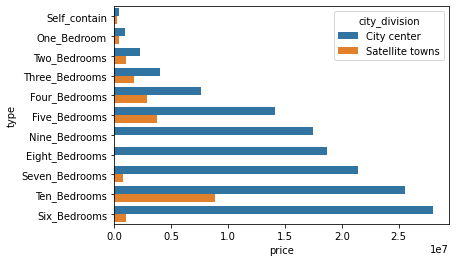

In [153]:
result_ = abuja_df.groupby('type')['price'].mean().reset_index().sort_values('price')
sns.barplot(x = 'price', y = 'type', data = abuja_df, order = result_['type'], hue = 'city_division', ci=None)
#plt.ticklabel_format(style='plain', axis='x')
plt.show()